In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
plt.ion()
# %matplotlib notebook

In [2]:
## this is just a chart function for use in the cells below
def chart(x, y, y_actual, y_estimate, error_history):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.scatter(x, y)
    plt.plot(x, y_actual)
    plt.plot(x, y_estimate)
    plt.title("Data and sample")
    
    plt.subplot(1, 2, 2)
    plt.plot(error_history)
    plt.title("Error history")
    
def chart_ab(a, b):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.plot(a)
    plt.title("a value")
    
    plt.subplot(1, 2, 2)
    plt.plot(b)
    plt.title("b value")

# Free Online Courses
http://course.fast.ai/
https://www.coursera.org/specializations/deep-learning

# An linear function

## $ f(x) = ax + b $

x: [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
y_actual: [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5
  4.   4.5  5.   5.5  6.   6.5  7. ]
y (sample data): [-2.2710674  -1.1370584  -0.49584275 -3.8795552  -0.7676293   0.8111397
  0.9298773   0.90332913  0.7178507  -0.5665452   0.5870751   4.6236596
  8.633515    3.073184    1.9795185   3.326024    2.9927995   8.596585
  5.4654226   7.099667    6.2172594 ]


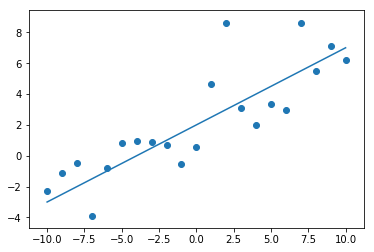

In [3]:
x = np.arange(-10, 11).astype("float32")
print("x:", x)
y_actual = 0.5 * x + 2  # a * x + b
print("y_actual:", y_actual)

y = y_actual + np.random.randn(21) * 2 # Generate some data and add noise
y = y.astype("float32")
print("y (sample data):", y)

plt.plot(x, y_actual)
plt.scatter(x, y)
plt.show()

# A random guess

y_estimate: [ 50.  45.  40.  35.  30.  25.  20.  15.  10.   5.   0.  -5. -10. -15.
 -20. -25. -30. -35. -40. -45. -50.]


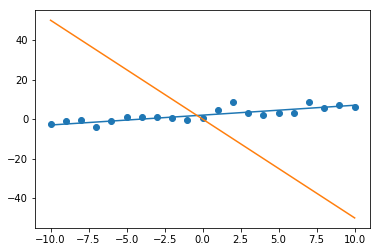

[-52.27107   -46.13706   -40.495842  -38.879555  -30.76763   -24.18886
 -19.070122  -14.096671   -9.282149   -5.566545    0.5870751   9.623659
  18.633514   18.073185   21.979519   28.326023   32.992798   43.596584
  45.465424   52.099667   56.21726  ]
[2.7322646e+03 2.1286282e+03 1.6399132e+03 1.5116198e+03 9.4664703e+02
 5.8510095e+02 3.6366956e+02 1.9871614e+02 8.6158295e+01 3.0986423e+01
 3.4465718e-01 9.2614815e+01 3.4720786e+02 3.2664001e+02 4.8309924e+02
 8.0236359e+02 1.0885247e+03 1.9006621e+03 2.0671047e+03 2.7143752e+03
 3.1603801e+03]


In [4]:
#randomly initialize weights
w_a = -5
w_b = 0

y_estimate = w_a * x + w_b
print("y_estimate:", y_estimate)

plt.scatter(x, y)
plt.plot(x, y_actual)
plt.plot(x, y_estimate)
plt.show()

# error calculation
l1_error = y - y_estimate
print(l1_error)
# error squared
l2_error = l1_error * l1_error
print(l2_error)

# Gradient decent
https://en.wikipedia.org/wiki/Gradient_descent

In [5]:
# Let's create 3 lists to store our history of these values
error_history = []  # logging
w_a_history = [w_a]  # logging
w_b_history = [w_b]  # logging

w_a: 0.4687059238978797 w_b: 2.0289300891331266
y_estimate: [-2.6581292 -2.189423  -1.7207172 -1.2520113 -0.7833054 -0.3145995
  0.1541065  0.6228124  1.0915184  1.5602243  2.0289302  2.497636
  2.966342   3.435048   3.9037538  4.37246    4.8411655  5.3098717
  5.778578   6.2472835  6.7159896]
75.2443


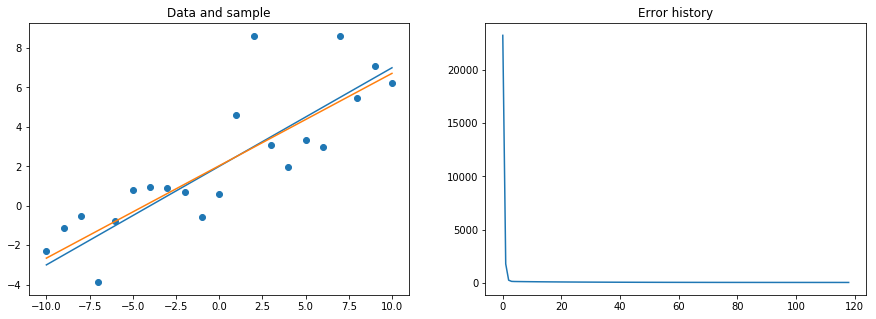

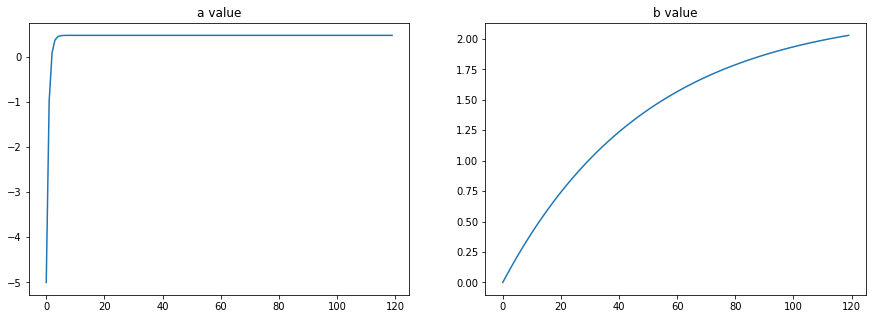

In [25]:
for i in range(100):
    l1 = y - y_estimate
    l2_error = l1 * l1
    error_history.append(l2_error.sum())  # logging
    learning_rate = 0.01
    
    """https://www.khanacademy.org/math/ap-calculus-ab/ab-derivative-intro """
    # de/da = de/dl1 * dl1/da = 2 * (dl1) * -(x)
    # de/db = de/dl1 * dl1/db = 2 * (dl1) * -1
    de_da = 2 * l1 * -x    # gradient of error with respect to a
    de_db = 2 * l1 * -1   # gradient of error with respect to b
    w_a = w_a - learning_rate * de_da.sum() / x.shape[0]
    w_b = w_b - learning_rate * de_db.sum() / x.shape[0]
    
    w_a_history.append(w_a)  # logging
    w_b_history.append(w_b)  # logging

    y_estimate = w_a * x + w_b

chart(x, y, y_actual, y_estimate, error_history)
chart_ab(w_a_history, w_b_history)

print("w_a:", w_a, "w_b:", w_b)
y_estimate = w_a * x + w_b
print("y_estimate:", y_estimate)
print(error_history[len(error_history)-1])

# Using tensorflow for this

In [28]:
import tensorflow as tf

/home/william/anaconda3/envs/deeprlbootcamp/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Linear Function again
$ f(x) = ax + b $

In [26]:
"""Setting up a linear function again"""
x = np.arange(-10, 11).astype("float32")
print("x:", x)
y_actual = 0.5 * x + 2
print("y_actual:", y_actual)

y = y_actual + np.random.randn(21) * 0.5
y = y.astype("float32")
print("y (sample data):", y)

x: [-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.  10.]
y_actual: [-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5
  4.   4.5  5.   5.5  6.   6.5  7. ]
y (sample data): [-3.7396033  -2.837028   -0.52782214 -1.8213881  -0.42812714 -1.3139764
  0.29185534 -0.04897368  1.552111    1.1684786   1.601081    3.4806304
  3.1710951   2.8437958   3.535163    4.4316053   4.600046    4.585769
  6.518772    5.815447    8.330418  ]


(21, 1) (21, 1)
Weights before: [array([[0.51660097]], dtype=float32), array([0.], dtype=float32)]
Prediction: [-3.061829   -2.560668   -2.059507   -1.5583458  -1.0571849  -0.5560241
 -0.05486298  0.446298    0.947459    1.44862     1.949781    2.450942
  2.952103    3.4532638   3.9544249   4.455586    4.956747    5.4579077
  5.959069    6.46023     6.961391  ]
Weights after: [array([[0.501161]], dtype=float32), array([1.949781], dtype=float32)]
Loss: 0.47617417573928833


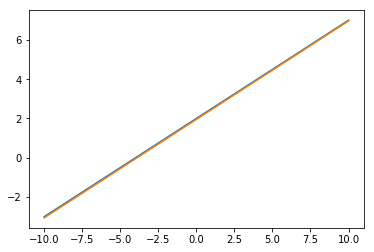

In [29]:
# define input, only 1 value in per sample
inputs = tf.keras.layers.Input(shape=(1,))
# add a layer with 1 node
hidden_layer = tf.keras.layers.Dense(1)(inputs)
predictions = hidden_layer

model = tf.keras.models.Model(inputs=inputs, outputs=predictions)
sgd = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

# put data into the correct shape
tf_x = np.expand_dims(x, axis=1)
tf_y = np.expand_dims(y, axis=1)
print(tf_x.shape, tf_y.shape)


print("Weights before:", model.get_weights())

"""Train the model"""
history = model.fit(tf_x, tf_y, epochs=250, verbose=0)

print("Prediction:", model.predict(tf_x).squeeze())
print("Weights after:", model.get_weights())
print("Loss:", history.history["loss"][-1])

plt.plot(x, y_actual)
plt.plot(x, model.predict(tf_x).squeeze())

# A non linear function

## $ f(x) = x^2 $


x: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
y_actual: [100  81  64  49  36  25  16   9   4   1   0   1   4   9  16  25  36  49
  64  81 100]


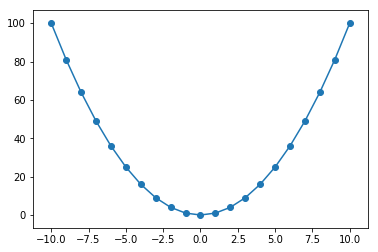

In [31]:
x = np.arange(-10, 11)
print("x:", x)
y_actual = x * x
print("y_actual:", y_actual)

y = y_actual + 0 #np.random.randn(21) * 10

plt.plot(x, y_actual)
plt.scatter(x, y)
plt.show()

(21, 1) (21, 1)
Prediction: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.53055096  7.3151703
 14.09979    20.88441    27.66903    34.453648   41.23827    48.02289
 54.807507   61.592125   68.37674   ]
Loss: 1301.6361083984375


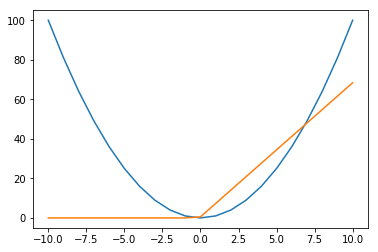

In [68]:
# define input, only 1 value in per sample
inputs = tf.keras.layers.Input(shape=(1,))
# add a layer with 1 node
predictions = tf.keras.layers.Dense(1, activation="relu")(inputs)
# hidden_layer = tf.keras.layers.Dense(32, activation="relu")(inputs)
# hidden_layer = tf.keras.layers.Dense(32, activation="relu")(hidden_layer)
# hidden_layer = tf.keras.layers.Dense(32, activation="relu")(hidden_layer)
# hidden_layer = tf.keras.layers.Dense(32, activation="relu")(hidden_layer)
# hidden_layer = tf.keras.layers.Dense(32, activation="relu")(hidden_layer)
# predictions = tf.keras.layers.Dense(1, activation="relu")(hidden_layer)

model = tf.keras.models.Model(inputs=inputs, outputs=predictions)
sgd = tf.keras.optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

# put data into the correct shape
tf_x = np.expand_dims(x, axis=1)
tf_y = np.expand_dims(y, axis=1)
print(tf_x.shape, tf_y.shape)


# print("Weights before:", model.get_weights())

"""Train the model"""
history = model.fit(tf_x, tf_y, epochs=500, verbose=0)

print("Prediction:", model.predict(tf_x).squeeze())
# print("Weights after:", model.get_weights())
print("Loss:", history.history["loss"][-1])

plt.plot(x, y_actual)
plt.plot(x, model.predict(tf_x).squeeze())